## Perceptron

El perceptron es una de las primeras aproximaciones a la emulación de sistemas físicos de manera artificial. Estos habitualmente son referidos como modelos bioinspirados.

Si tomamos como ejemplo la estructura de una neurona

<img src="./../../../../assets/images/Neurona.webp" alt="drawing" width="650"/>

Podemos intentar emular su funcionamiento como si de una estructura artificial (fórmula) se tratara.

<img src="./../../../../assets/images/perceptron-6168423.jpg" alt="drawing" width="650"/>

Empezamos cargando librerías...

In [1]:
import pandas as pd
import seaborn as sns

Cargamos datos. Utilizaremos el dataset de pinguinos de seaborn

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Limpiamos un poco los datos
df.dropna(inplace=True)
cleanup_nums = {"species": {"Adelie": 0,
                            "Chinstrap": 1,
                            "Gentoo": 2},
               "sex": {"Male": 0,
                       "Female": 1}}

df.replace(to_replace=cleanup_nums, inplace=True)
df = pd.concat([df.drop(columns="island"), pd.get_dummies(df["island"], dtype="int")], axis=1)

df.head()

/tmp/ipykernel_734125/2405858234.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=cleanup_nums, inplace=True)


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,0,1


In [5]:
df["species"] = df["species"].astype("int")
df["sex"] = df["sex"].astype("int")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    int64  
 6   Biscoe             333 non-null    int64  
 7   Dream              333 non-null    int64  
 8   Torgersen          333 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 26.0 KB


In [7]:
df.describe(include="all")

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,43.992793,17.164865,200.966967,4207.057057,0.495495,0.489489,0.369369,0.141141
std,0.889718,5.468668,1.969235,14.015765,805.215802,0.500732,0.500642,0.483360,0.348691
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000,1.000000,1.000000


Dividimos en train test

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["species"])
y = df[["species"]].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 8)
(67, 8)
(266,)
(67,)


Vamos a probar un Perceptrón

In [10]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=1)
per_clf.fit(X_train, y_train)
per_clf.score(X_test, y_test)

0.19402985074626866

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

1.0

Probemos con el escalado MinMax, en este caso en el rango (-1, 1)... Haciendo un símil a las señales de activación e inhibición que reciben las neuronas.

In [12]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler((-1, 1)).fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

per_clf = Perceptron(random_state=1)
per_clf.fit(X_train_scaled, y_train)
per_clf.score(X_test_scaled, y_test)

1.0

Pero nuestra capacidad no está en una sola neurona, son las estructuras que forman las que nos permiten hacer todo lo que hacemos.

## Multi Layer Perceptron

El perceptrón multicapa fue uno de los grandes hallazgos de el siglo pasado, en concreto cómo poder entrenar estas estructuras tan complejas para poder fijar las relaciones entre entradas y salidas de datos.

![hist](./../../../../assets/images/figure1_ANN_history.jpg)

El propio Geoffrey Hinton dió una charla sobre este recorrido hasta 2025 aproximadamente: https://www.youtube.com/watch?v=IkdziSLYzHw

![mlp](./../../../../assets/images/neuralnet_mlp_1.webp)

Una buena referencia de cómo funciona la retropropagación del error: https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/

In [13]:
import json

class MultilayerPerceptron:
    def __init__(self, layers, loss_layer):

        # Estructura de capas
        self.layers = layers
        self.loss_layer = loss_layer

    def predict(self, x, layers, is_train):
        """
        La predicción ejecuta la multiplicación de los pesos,
        suma y función de activación, en un orden de izquierda a derecha.
        """
        input_arr = x
        for layer in layers:
            # Forward
            res = layer.forward(input_arr, is_train)
            input_arr = res

        return res

    def calculate_loss(self, x, label, layers, is_train):
        res = self.predict(x, layers, is_train)
        return self.loss_layer.forward(res, label)

    def backward(self, label, layers):
        """
        Propagamos el error hacia atrás de forma que podamos
        ajustar el valor de los pesos.
        """
        dx = label
        for layer in reversed(layers):
            res = layer.backward(dx)
            dx = res

    def save_parameters(self, output_param_path):
        params = []
        for layer in self.layers:
            params = layer.save_parameters(params)

        params = self.loss_layer.save_parameters(params)
        save_data = {}
        save_data["params"] = params
        with open(output_param_path, "w") as f:
            json.dump(save_data, f, indent=4)

In [14]:
import numpy as np
from capas import Affine, Sigmoid, BinaryCrossEntropy, Softmax

hidden_layer_size = 10
lr_rate = 1e-4

# Capa de entrada
_, entradas = X_train.shape
input_layer = Affine(entradas, hidden_layer_size, lr_rate)
sigmoid_layer_0 = Sigmoid()

# Capa oculta
hidden_layer_1 = Affine(hidden_layer_size, hidden_layer_size, lr_rate)
sigmoid_layer_1 = Sigmoid()

# Capa de salida
output_layer = Affine(hidden_layer_size, 2, lr_rate)
softmax_layer = Softmax(X_train_scaled.shape[0], 2)
loss_layer = BinaryCrossEntropy()

# Arquitectura de la red
layers = [
    input_layer,
    sigmoid_layer_0,
    hidden_layer_1,
    sigmoid_layer_0,
    output_layer,
    softmax_layer,
]
net = MultilayerPerceptron(layers, loss_layer)

La **entropía cruzada binaria** (binary cross-entropy) es una función de pérdida fundamental en el aprendizaje automático, especialmente utilizada en problemas de clasificación binaria. Mide la diferencia entre dos distribuciones de probabilidad para una variable aleatoria binaria. En el contexto del machine learning, compara la distribución de probabilidad predicha por el modelo con la distribución real de las etiquetas.

Para una sola muestra:

$$
BCE = -\left(y\log(\hat{y}) + (1-y) \log(1-\hat{y})\right)
$$
donde $y$ es la etiqueta real (0 o 1) y $\hat{y}$ es la probabilidad predicha (entre 0 y 1)

Para un conjunto de datos con N muestras lo generalizamos a

$$
BCE = \frac{-1}{N} \sum\left(y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)\right)
$$

La función penaliza fuertemente las predicciones que están muy alejadas de la etiqueta real. Cuando la predicción es correcta y confiable (ŷ ≈ 1 cuando y = 1, o ŷ ≈ 0 cuando y = 0), la pérdida es pequeña. Sin embargo, cuando la predicción es incorrecta y confiable, la pérdida se aproxima al infinito.

Esta función es convexa y diferenciable, lo que facilita la optimización mediante gradiente descendente. Su derivada tiene una forma simple que permite un entrenamiento eficiente de redes neuronales.


Ahora nos toca iterar sobre los datos _suficientes_ veces hasta aprender los pesos adecuados.

In [15]:
iters_num = 200
epoch_cnt = 0
epoch_num = 10
epoch_all = int(iters_num / epoch_num)

learning_history = {}
for itr in range(iters_num):
    loss = net.calculate_loss(X_train_scaled, y_train, layers, True)

    net.backward(y_train, layers)

    if itr % epoch_num == 0:
        epoch_cnt += 1
        val_loss = net.calculate_loss(
            np.array(X_test_scaled),
            np.array(y_test),
            layers,
            False,
        )
        learning_history[epoch_cnt] = {"train_loss": loss, "val_loss": val_loss}
        print(
            "Epoch: {0}/{1} Loss: {2} Val Loss: {3}".format(
                epoch_cnt, epoch_all, round(loss, 4), round(val_loss, 4)
            )
        )

Epoch: 1/20 Loss: -1.1105 Val Loss: -1.0838
Epoch: 2/20 Loss: -1.2227 Val Loss: -1.1842
Epoch: 3/20 Loss: -1.3018 Val Loss: -1.2553
Epoch: 4/20 Loss: -1.3579 Val Loss: -1.3058
Epoch: 5/20 Loss: -1.3979 Val Loss: -1.3419
Epoch: 6/20 Loss: -1.4267 Val Loss: -1.3678
Epoch: 7/20 Loss: -1.4474 Val Loss: -1.3866
Epoch: 8/20 Loss: -1.4625 Val Loss: -1.4003
Epoch: 9/20 Loss: -1.4736 Val Loss: -1.4103
Epoch: 10/20 Loss: -1.4818 Val Loss: -1.4177
Epoch: 11/20 Loss: -1.4879 Val Loss: -1.4232
Epoch: 12/20 Loss: -1.4925 Val Loss: -1.4274
Epoch: 13/20 Loss: -1.496 Val Loss: -1.4306
Epoch: 14/20 Loss: -1.4988 Val Loss: -1.4331
Epoch: 15/20 Loss: -1.501 Val Loss: -1.4351
Epoch: 16/20 Loss: -1.5028 Val Loss: -1.4368
Epoch: 17/20 Loss: -1.5044 Val Loss: -1.4382
Epoch: 18/20 Loss: -1.5057 Val Loss: -1.4394
Epoch: 19/20 Loss: -1.5069 Val Loss: -1.4405
Epoch: 20/20 Loss: -1.508 Val Loss: -1.4415


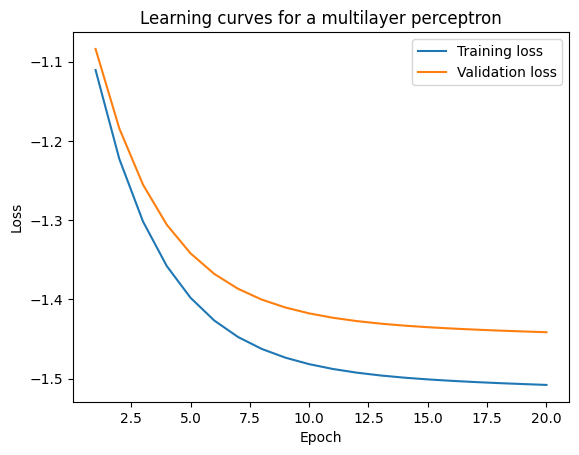

In [16]:
import matplotlib.pyplot as plt

epoch = []
train_loss = []
val_loss = []
for key in learning_history:
    epoch.append(key)
    train_loss.append(learning_history[key]["train_loss"])
    val_loss.append(learning_history[key]["val_loss"])

plt.plot(epoch, train_loss, label="Training loss")
plt.plot(epoch, val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Learning curves for a multilayer perceptron")
plt.legend()
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

mlp.score(X_test, y_test)

0.43283582089552236

In [18]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

mlp.score(X_test_scaled, y_test)

/home/david/Vídeos/2025-09-STEMIA/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

Probemos otra configuración. Es posible crear una red neuronal desde la propia función de `MLPClassifier()` indicando diversas opciones como por ejemplo, la estructura de la red o las funciones de activación a emplear.

* Funciones de activación: https://en.wikipedia.org/wiki/Activation_function

In [19]:
mlp = MLPClassifier(max_iter=500,
                   activation='logistic',
                   hidden_layer_sizes = (150, 150, 150),
                   random_state=42)

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.7164179104477612

In [20]:
mlp = MLPClassifier(max_iter=500,
                   activation='tanh',
                   hidden_layer_sizes = (150, 150, 150),
                   random_state=42)

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.34328358208955223

In [21]:
mlp = MLPClassifier(max_iter=500,
                   activation='relu',
                   hidden_layer_sizes = (150, 150, 150),
                   random_state=42)

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.4626865671641791

In [22]:
mlp = MLPClassifier(max_iter=500,
                   activation='relu',
                   hidden_layer_sizes = (150, 150, 150),
                   random_state=42)

mlp.fit(X_train_scaled, y_train)
mlp.score(X_test_scaled, y_test)

1.0

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, mlp.predict(X_test_scaled))

array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]])

Para entrenar estas redes se utiliza el descenso del gradiente, y por tanto son muy sensibles al escalado. La selección de función de activación y estructura a emplear es la clave a la hora de acometer tareas concretas.

* Arquitecturas base: https://www.asimovinstitute.org/neural-network-zoo/
